In [3]:
#importing required libraries
from numpy import sin, cos, deg2rad, matrix, size, invert, multiply, array
from matplotlib.pyplot import plot
import matplotlib.pyplot as plt
#from sympy import init_printing
from mpl_toolkits.mplot3d import Axes3D
import csv
import pandas as pd
import os
import sys
import functionsmd

#import grid

In [5]:
functionsmd.printhello()

hello


In [3]:
def N_xyz(Nx_,Ny_,Nz_): #defining number of atoms along x, y and z axis
    return [Nx_,Ny_,Nz_]
ial = 1.02e-10 #interatomic length
N = N_xyz(100,6,6)

In [23]:
X=(N[0]-1) * ial
Y=(N[1]-1) * ial
Z=(N[2]-1) * ial

x_coor_0 =[]
for i in range(N[0]):
    x_coor_0.append((-X/2)+(i*ial))
y_coor_0 =[]
for i in range(N[1]):
    y_coor_0.append((-Y/2)+(i*ial))
z_coor_0 =[]
for i in range(N[2]):
    z_coor_0.append((-Z/2)+(i*ial))

coor_0 = [x_coor_0,y_coor_0,z_coor_0]   



In [5]:
vel = 0.0001e-10 #velocity per step
acc = 0 #acceleration
ts = 0.001e-9 #timestep ex: 0.005 nano seconds as 0.005e-9
N_steps = 10

In [6]:
#verlet algorithm
def verlet_pos(pos,t,ts,acc):
#    pos_t_plus_dt = pos + vel*ts + ( 0.5 * acc * ts**2 )
#    pos_t_minus_dt = pos - vel*ts + ( 0.5 * acc * ts**2 )
    pos_t_plus_dt = 2*pos - pos*(t-ts) + acc * ts**2
    return pos_t_plus_dt
#----------------------------------------------------------------
x_coor=[x_coor_0]
t=0
for i in range(N_steps):
    x_coor_temp = []
    for pos_ in x_coor[-1]:
        x_coor_temp.append(verlet_pos(pos_, t+(i*ts), ts, acc))
    x_coor.append(x_coor_temp)

In [7]:
def growth(x_coor_local):
    return_list = []
    p_temp=[]
    q_temp=[]
    for i in range(N_steps):
        x_coor_growth_temp=[]
        p=0
        q=0
        for j in range(N[0]):
            if x_coor_local[i][j]>=0:
                x_coor_growth_temp.append([x_coor_local[i+1][j]-x_coor_local[i][j],"p"])
                p+=1
            else:
                x_coor_growth_temp.append([x_coor_local[i][j]-x_coor_local[i+1][j],"q"])
                q+=1
        p_temp.append(p)
        q_temp.append(q)
        return_list.append(x_coor_growth_temp)
    
    return return_list,p_temp,q_temp
delx_, p , q = growth(x_coor)

In [8]:
# my_df = pd.DataFrame(x_coor)
# my_df.to_csv('x_coor.csv', index=False, header=False)
# my_df = pd.DataFrame(x_coor)
# my_df.to_csv('x_coor.csv', index=False, header=False)

In [9]:
def mean_delx(delx__,char):
    growth_temp=[]
    for i in range(N_steps):
        sum=0
        c_count=0
        for j in range(N[0]):
            #print(delx__[i][j][0])
            #print(char)
            if delx__[i][j][1]==char:
                c_count+=1
                #print("if")
                sum+=delx__[i][j][0]
        #print(c_count)
        growth_temp.append(sum/c_count)
    return growth_temp
delx_p_mean = mean_delx(delx_,'p')
delx_q_mean = mean_delx(delx_,'q')

In [10]:
def length_of_growth_at_steps_fn(delx_p_mean_temp,delx_q_mean_temp):
    length_of_growth_at_steps_temp = []
    for i in range(N_steps):
        delX_p_mean = sum(delx_p_mean_temp[0:i+1])
        delX_q_mean = sum(delx_q_mean_temp[0:i+1])
        delX_mean = delX_p_mean + delX_q_mean
        length_of_growth_at_steps_temp.append(delX_mean)
    return length_of_growth_at_steps_temp

total_length_of_growth_at_steps = length_of_growth_at_steps_fn(delx_p_mean,delx_q_mean)

In [11]:
strain_in_steps = multiply((1/X),total_length_of_growth_at_steps)

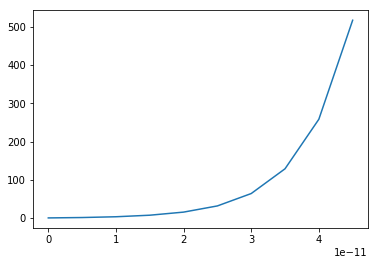

In [12]:
plot(multiply(0.005e-9,range(N_steps)),strain_in_steps)

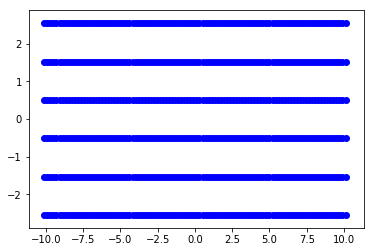

In [19]:
for i in multiply(array(x_coor[1]),10**9):
        for j in multiply(array(y_coor_0),10**10):
            plt.scatter(i,j,c='b',marker='o')
plt.show()

In [22]:
verlet_pos(x_coor_0,12,0.005e-9,0)

TypeError: can't multiply sequence by non-int of type 'float'